In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
 

Matplotlib is building the font cache; this may take a moment.


In [4]:
df=pd.read_csv('D:\DS\players_20.csv')
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtrar por Equipos ingleses



In [5]:
Premier_teams = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton & Hove Albion', 
            'Burnley', 'Chelsea', 'Crystal Palace','Everton', 'Leicester City', 
            'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 
            'Norwich City', 'Sheffield United', 'Southampton', 'Tottenham Hotspur', 
            'Watford', 'West Ham United', 'Wolverhampton Wanderers']

In [7]:
df['new'] = df['club'].apply(lambda x: 1 if x in Premier_teams else 0)
Premier_teams = df[df['new'] == 1]

## Filtramos Data

In [8]:
# remove NA's
Premier_teams = Premier_teams.dropna(axis='columns') 

# remove Goalkeepers
Premier_teams = Premier_teams[Premier_teams['player_positions'] != 'GK'] 

# remove Goalkeepers skills 
Premier_teams = Premier_teams.loc[:,~Premier_teams.columns.str.contains('^goalkeeping', case=False)] 

# remove non-numerical data
Premier_teams = Premier_teams._get_numeric_data() 

Premier_teams= Premier_teams.drop(columns=['sofifa_id', 'new', 'value_eur', 'team_jersey_number','contract_valid_until', 'overall', 'potential'])

# Data Exploration

In [9]:
Premier_teams.columns

Index(['age', 'height_cm', 'weight_kg', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

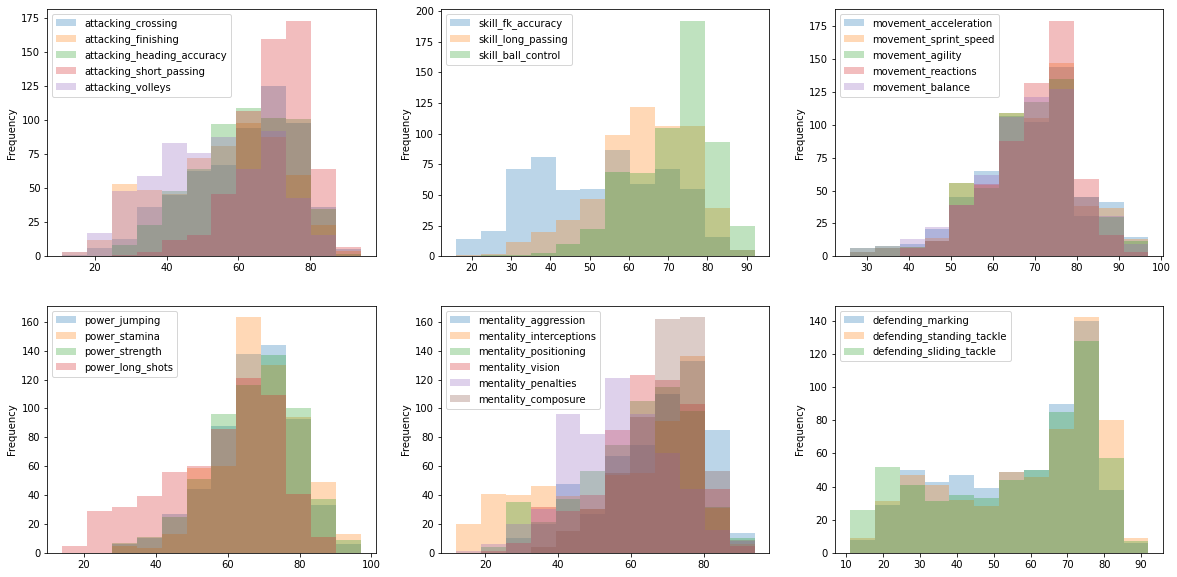

In [10]:
from matplotlib.pyplot import figure

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# fig, ax = plt.subplots()

Premier_teams.loc[:, ['attacking_crossing', 'attacking_finishing', 
                 'attacking_heading_accuracy', 'attacking_short_passing',
                 'attacking_volleys']].plot.hist(bins=12, alpha=0.3, ax=axes[0,0])

Premier_teams.loc[:, ['skill_fk_accuracy', 'skill_long_passing', 
                 'skill_ball_control']].plot.hist(bins=12, alpha=0.3, ax=axes[0,1])

Premier_teams.loc[:, ['movement_acceleration', 'movement_sprint_speed', 
                 'movement_agility', 'movement_reactions', 
                 'movement_balance']].plot.hist(bins=12, alpha=0.3, ax=axes[0,2])

Premier_teams.loc[:, ['power_jumping', 'power_stamina', 'power_strength',
                 'power_long_shots']].plot.hist(bins=12, alpha=0.3, ax=axes[1,0])

Premier_teams.loc[:, ['mentality_aggression', 'mentality_interceptions',
                 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                 'mentality_composure']].plot.hist(bins=12, alpha=0.3, ax=axes[1,1])

Premier_teams.loc[:, ['defending_marking', 'defending_standing_tackle',
                 'defending_sliding_tackle']].plot.hist(bins=12, alpha=0.3, ax=axes[1,2])